In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

pd.set_option('display.max_columns', None)

file_path = os.path.join(os.path.dirname(sys.path[0]), 'clean_data/gurgaon_properties_outliers_treated.csv')
df = pd.read_csv(file_path)

df.head()


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,supertech hues,sector 68,0.90,7627.0,1180.0,Carpet area: 1180 (109.63 sq.m.),2,2,2,1.0,East,New Property,NaN,NaN,1180.0,0,0,0,0,0,0,44
1,flat,gls avenue 51,sector 92,0.45,7614.0,591.0,Built Up area: 646 (60.02 sq.m.)Carpet area: 5...,2,2,1,10.0,NaN,New Property,NaN,646.0,591.0,0,1,0,0,0,2,20
2,flat,beverley park 1,sector 43,8.44,16231.0,5200.0,Super Built up area 5200(483.1 sq.m.)Built Up ...,4,5,3,9.0,North-East,Moderately Old,5200.0,5000.0,4900.0,1,0,0,0,0,1,117
3,flat,bestech park view ananda,sector 81,1.35,7542.0,1790.0,Carpet area: 1790 (166.3 sq.m.),3,3,3+,8.0,North,Old Property,NaN,NaN,1790.0,0,0,0,0,0,0,123
4,house,nitin vihar,sector 33,0.85,9444.0,900.0,Plot area 900(83.61 sq.m.),3,2,0,1.0,West,Relatively New,NaN,900.0,NaN,0,0,0,0,0,0,15


In [2]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedroom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1969
carpet_area            1715
servant room              0
study room                0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

# built_up_area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

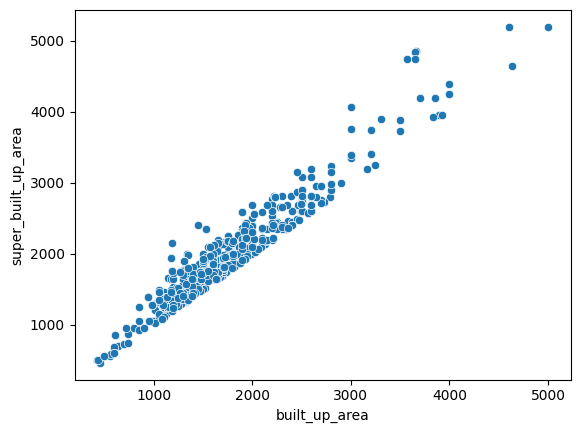

In [3]:
sns.scatterplot(data = df, x = 'built_up_area', y = 'super_built_up_area')

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

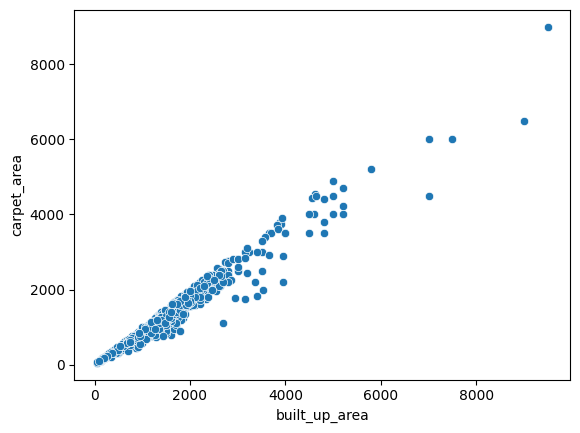

In [4]:
sns.scatterplot(data = df, x = 'built_up_area', y = 'carpet_area')

In [5]:
df[df['super_built_up_area'].isnull()][df['built_up_area'].isnull()][df['carpet_area'].isnull()].shape

/tmp/ipykernel_98369/2895043370.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['super_built_up_area'].isnull()][df['built_up_area'].isnull()][df['carpet_area'].isnull()].shape
/tmp/ipykernel_98369/2895043370.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['super_built_up_area'].isnull()][df['built_up_area'].isnull()][df['carpet_area'].isnull()].shape


(0, 23)

In [6]:
df[df['super_built_up_area'].notnull()][df['built_up_area'].notnull()][df['carpet_area'].notnull()].shape

/tmp/ipykernel_98369/3828952767.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['super_built_up_area'].notnull()][df['built_up_area'].notnull()][df['carpet_area'].notnull()].shape
/tmp/ipykernel_98369/3828952767.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['super_built_up_area'].notnull()][df['built_up_area'].notnull()][df['carpet_area'].notnull()].shape


(531, 23)

In [7]:
expr = (df['super_built_up_area'].notnull()) & (df['built_up_area'].notnull()) & (df['carpet_area'].notnull())
s_b_ratio = (df[expr]['super_built_up_area'] / df[expr]['built_up_area']).median()
c_b_ratio = (df[expr]['carpet_area'] / df[expr]['built_up_area']).median()
s_b_ratio, c_b_ratio

(1.105263157894737, 0.9)

In [8]:
expr = (df['super_built_up_area'].notnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].notnull())
temp_df = df[expr]
temp_df['built_up_area'].fillna((((df[expr]['super_built_up_area'] / s_b_ratio) + (df[expr]['carpet_area'] / c_b_ratio)) / 2), inplace = True)
df.update(temp_df)

/tmp/ipykernel_98369/3664636150.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['built_up_area'].fillna((((df[expr]['super_built_up_area'] / s_b_ratio) + (df[expr]['carpet_area'] / c_b_ratio)) / 2), inplace = True)
/tmp/ipykernel_98369/3664636150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['built_up_area'].fillna(((

In [9]:
expr = (df['super_built_up_area'].notnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())
temp_df = df[expr]
temp_df['built_up_area'].fillna(df['super_built_up_area'] / s_b_ratio, inplace=True)
df.update(temp_df)

/tmp/ipykernel_98369/3309016449.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['built_up_area'].fillna(df['super_built_up_area'] / s_b_ratio, inplace=True)
/tmp/ipykernel_98369/3309016449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['built_up_area'].fillna(df['super_built_up_area'] / s_b_ratio, inplace=True)
/tmp/ip

In [10]:
expr = (df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].notnull())
temp_df = df[expr]
temp_df['built_up_area'].fillna(df['carpet_area'] / c_b_ratio, inplace=True)
df.update(temp_df)

/tmp/ipykernel_98369/3063016673.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df['built_up_area'].fillna(df['carpet_area'] / c_b_ratio, inplace=True)
/tmp/ipykernel_98369/3063016673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['built_up_area'].fillna(df['carpet_area'] / c_b_ratio, inplace=True)
/tmp/ipykernel_98369/30

In [11]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedroom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
servant room              0
study room                0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

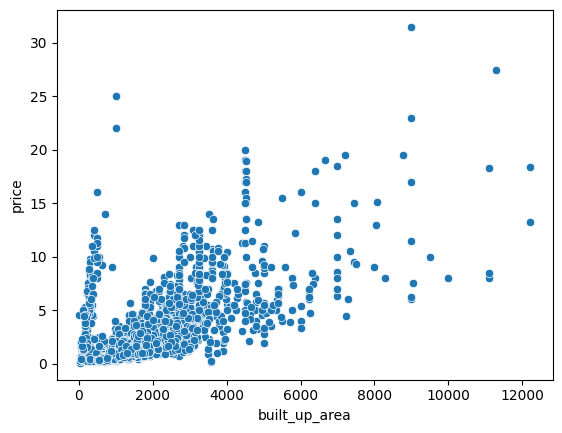

In [12]:
sns.scatterplot(data = df, x = 'built_up_area', y = 'price')

In [13]:
df[df['built_up_area'] < 2000][df['price'] > 2.5][['price', 'area', 'built_up_area']].sample(5)

/tmp/ipykernel_98369/2929533388.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['built_up_area'] < 2000][df['price'] > 2.5][['price', 'area', 'built_up_area']].sample(5)


,price,area,built_up_area
822,3.65,2395.0,1869.000000
3352,4.75,1650.0,1700.000000
1649,2.80,2047.0,1970.468254
102,2.90,2003.0,1812.238095
2687,2.75,1557.0,1557.000000


/tmp/ipykernel_98369/23850420.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = df[df['built_up_area'] < 2000][df['price'] > 2.5]
/tmp/ipykernel_98369/23850420.py:3: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(temp_df)
/tmp/ipykernel_98369/23850420.py:3: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior,

<Axes: xlabel='built_up_area', ylabel='price'>

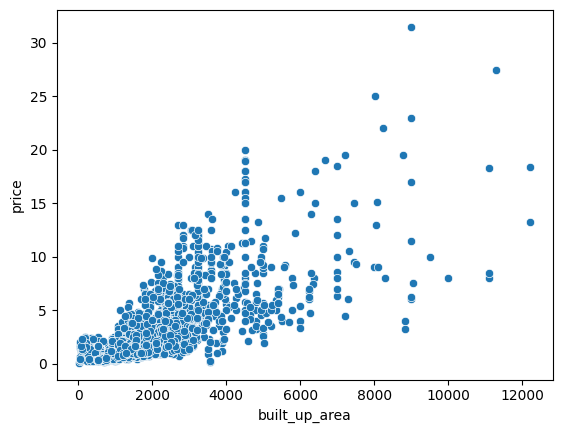

In [14]:
temp_df = df[df['built_up_area'] < 2000][df['price'] > 2.5]
temp_df['built_up_area'] = temp_df['area']
df.update(temp_df)
sns.scatterplot(data = df, x = 'built_up_area', y = 'price')

In [15]:
df.drop(columns=['area', 'areaWithType', 'super_built_up_area', 'carpet_area'], inplace=True)

In [16]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedroom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
servant room          0
study room            0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [17]:
df[df['floorNum'].isnull()].sample(5)

,property_type,society,sector,price,price_per_sqft,bedroom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
1696,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,1,0,1,1,0,0,97
2946,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,1,0,0,0,0,0,68
1907,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
2896,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
3302,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21


In [18]:
value = df[df['property_type'] == 'house']['floorNum'].median()
df['floorNum'].fillna(value, inplace=True)

/tmp/ipykernel_98369/1088185292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(value, inplace=True)


In [19]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedroom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
servant room          0
study room            0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [20]:
df.drop(columns=['facing'], inplace=True)

In [21]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
885,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [22]:
df.drop(index=df[df['society'].isnull()].index, inplace=True)
df.shape

(3554, 18)

In [23]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedroom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
study room         0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [24]:
df['agePossession'].value_counts()

agePossession
Relatively New        1606
New Property           557
Moderately Old         544
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [25]:
def mode_base_possession(row):
    if row['agePossession'] == 'Undefined':
        value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        if not value.empty:
            return value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [26]:
df['agePossession'] = df.apply(mode_base_possession, axis = 1)
df['agePossession'].value_counts()

agePossession
Relatively New        1718
New Property           597
Moderately Old         583
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [27]:
def mode_base_possession2(row):
    if row['agePossession'] == 'Undefined':
        value = df[df['sector'] == row['sector']]['agePossession'].mode()
        if not value.empty:
            return value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']
    
df['agePossession'] = df.apply(mode_base_possession2, axis = 1)
df['agePossession'].value_counts()

agePossession
Relatively New        1727
New Property           598
Moderately Old         590
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [28]:
def mode_base_possession3(row):
    if row['agePossession'] == 'Undefined':
        value = df[df['property_type'] == row['property_type']]['agePossession'].mode()
        if not value.empty:
            return value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']
    
df['agePossession'] = df.apply(mode_base_possession3, axis = 1)
df['agePossession'].value_counts()

agePossession
Relatively New        1729
Moderately Old         621
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [29]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedroom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
study room         0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [30]:
file_path = os.path.join(os.path.dirname(sys.path[0]), 'clean_data/gurgaon_properties_imputed.csv')
df.to_csv(file_path, index=False)